In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [4]:
df = pd.read_csv('/content/House_Rent_Dataset.csv')
df

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner
...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2022-05-18,2,15000,1000,3 out of 5,Carpet Area,Bandam Kommu,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner
4742,2022-05-15,3,29000,2000,1 out of 4,Super Area,"Manikonda, Hyderabad",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner
4743,2022-07-10,3,35000,1750,3 out of 5,Carpet Area,"Himayath Nagar, NH 7",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Agent
4744,2022-07-06,3,45000,1500,23 out of 34,Carpet Area,Gachibowli,Hyderabad,Semi-Furnished,Family,2,Contact Agent


In [5]:
df.groupby('Area Type')['Area Type'].agg('count')

Area Type
Built Area        2
Carpet Area    2298
Super Area     2446
Name: Area Type, dtype: int64

In [6]:
df = df.drop(['Posted On','Area Type','Floor','Tenant Preferred','Point of Contact'],axis = 1)
df.head()

,BHK,Rent,Size,Area Locality,City,Furnishing Status,Bathroom
0,2,10000,1100,Bandel,Kolkata,Unfurnished,2
1,2,20000,800,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,1
2,2,17000,1000,Salt Lake City Sector 2,Kolkata,Semi-Furnished,1
3,2,10000,800,Dumdum Park,Kolkata,Unfurnished,1
4,2,7500,850,South Dum Dum,Kolkata,Unfurnished,1


In [7]:
df.isna().sum()

BHK                  0
Rent                 0
Size                 0
Area Locality        0
City                 0
Furnishing Status    0
Bathroom             0
dtype: int64

In [8]:
df.shape

(4746, 7)

In [9]:
df['BHK'].unique()

array([2, 1, 3, 6, 4, 5])

In [10]:
df['Size'].dtype

dtype('int64')

In [11]:
df['Rent'].dtype

dtype('int64')

In [12]:
df['City'].unique()

array(['Kolkata', 'Mumbai', 'Bangalore', 'Delhi', 'Chennai', 'Hyderabad'],
      dtype=object)

In [13]:
df['Area Locality'].unique()

array(['Bandel', 'Phool Bagan, Kankurgachi', 'Salt Lake City Sector 2',
       ..., 'BN Reddy Nagar', 'Godavari Homes, Quthbullapur',
       'Manikonda, Hyderabad'], dtype=object)

In [14]:
len(df['Area Locality'].unique())

2235

In [15]:
df['Area Locality'] = df['Area Locality'].apply(lambda x : x.strip())
locality = df.groupby('Area Locality')['Area Locality'].agg('count').sort_values(ascending = False)
locality

Area Locality
Bandra West                    37
Gachibowli                     29
Electronic City                24
Miyapur, NH 9                  22
Velachery                      22
                               ..
Lake Superior, Powai            1
Lake Primrose, Powai            1
Lake Primrose, Chandivali       1
Lake Homes, Powai               1
117 Residency, Chembur East     1
Name: Area Locality, Length: 2234, dtype: int64

In [16]:
len(locality[locality <= 5])

2069

In [17]:
locality_less_than_5 = locality[locality <= 5]
locality_less_than_5

Area Locality
Thalambur                      5
Indira Nagar                   5
Kovilambakkam                  5
Meerpet                        5
Thanisandra                    5
                              ..
Lake Superior, Powai           1
Lake Primrose, Powai           1
Lake Primrose, Chandivali      1
Lake Homes, Powai              1
117 Residency, Chembur East    1
Name: Area Locality, Length: 2069, dtype: int64

In [18]:
def other_category(x):
    if x in locality_less_than_5:
        return 'other'
    else:
        return x

In [19]:
df['Area Locality'] = df['Area Locality'].apply(other_category)
len(df['Area Locality'].unique())

166

In [20]:
df['Furnishing Status'].unique()

array(['Unfurnished', 'Semi-Furnished', 'Furnished'], dtype=object)

In [21]:
df['Bathroom'].unique()

array([ 2,  1,  3,  5,  4,  6,  7, 10])

Text(0, 0.5, 'Count')

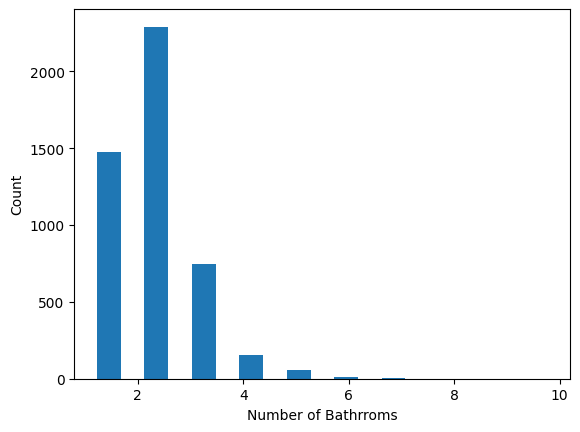

In [22]:
plt.hist(df['Bathroom'],rwidth = 0.5)
plt.xlabel('Number of Bathrroms')
plt.ylabel("Count")

In [23]:
No_of_bathrooms = df.groupby('Bathroom')['Bathroom'].agg('count').sort_values(ascending = False)
No_of_bathrooms

Bathroom
2     2291
1     1474
3      749
4      156
5       60
6       12
7        3
10       1
Name: Bathroom, dtype: int64

In [24]:
df[df['Bathroom'] > df['BHK'] + 2]

,BHK,Rent,Size,Area Locality,City,Furnishing Status,Bathroom
982,1,40000,680,other,Mumbai,Furnished,4
2846,4,150000,4000,other,Delhi,Semi-Furnished,7
3019,3,20000,1700,other,Chennai,Furnished,6
4185,1,200000,8000,"Beeramguda, Ramachandra Puram, NH 9",Hyderabad,Unfurnished,10


In [25]:
df = df[df['Bathroom'] <= df['BHK'] + 2]
df.shape

(4742, 7)

In [26]:
city_dummies = pd.get_dummies(df['City'])
city_dummies.head(5)

,Bangalore,Chennai,Delhi,Hyderabad,Kolkata,Mumbai
0,False,False,False,False,True,False
1,False,False,False,False,True,False
2,False,False,False,False,True,False
3,False,False,False,False,True,False
4,False,False,False,False,True,False


No charts were generated by quickchart


from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_1.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_2['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

In [28]:
city_dummies = city_dummies.astype(int)
city_dummies.head(5)

,Bangalore,Chennai,Delhi,Hyderabad,Kolkata,Mumbai
0,0,0,0,0,1,0
1,0,0,0,0,1,0
2,0,0,0,0,1,0
3,0,0,0,0,1,0
4,0,0,0,0,1,0


from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Bangalore']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Bangalore'}, axis=1)
              .sort_values('Bangalore', ascending=True))
  xs = counted['Bangalore']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_3.sort_values('Bangalore', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Bangalore')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Chennai']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Chennai'}, axis=1)
              .sort_values('Chennai', ascending=True))
  xs = counted['Chennai']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_4.sort_values('Chennai', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Chennai')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Delhi']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Delhi'}, axis=1)
              .sort_values('Delhi', ascending=True))
  xs = counted['Delhi']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_5.sort_values('Delhi', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Delhi')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Hyderabad']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Hyderabad'}, axis=1)
              .sort_values('Hyderabad', ascending=True))
  xs = counted['Hyderabad']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_6.sort_values('Hyderabad', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Hyderabad')
_ = plt.ylabel('count()')

In [29]:
df = pd.concat([df,city_dummies],axis = 1)
df.head()

,BHK,Rent,Size,Area Locality,City,Furnishing Status,Bathroom,Bangalore,Chennai,Delhi,Hyderabad,Kolkata,Mumbai
0,2,10000,1100,other,Kolkata,Unfurnished,2,0,0,0,0,1,0
1,2,20000,800,other,Kolkata,Semi-Furnished,1,0,0,0,0,1,0
2,2,17000,1000,Salt Lake City Sector 2,Kolkata,Semi-Furnished,1,0,0,0,0,1,0
3,2,10000,800,other,Kolkata,Unfurnished,1,0,0,0,0,1,0
4,2,7500,850,other,Kolkata,Unfurnished,1,0,0,0,0,1,0


from matplotlib import pyplot as plt
_df_7['Rent'].plot(kind='hist', bins=20, title='Rent')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8['Size'].plot(kind='hist', bins=20, title='Size')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_9['Bathroom'].plot(kind='hist', bins=20, title='Bathroom')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_10.groupby('Area Locality').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_11.groupby('Furnishing Status').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_12.plot(kind='scatter', x='Rent', y='Size', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_13.plot(kind='scatter', x='Size', y='Bathroom', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['BHK']
  ys = series['Rent']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_14.sort_values('BHK', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Area Locality')):
  _plot_series(series, series_name, i)
  fig.legend(title='Area Locality', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('BHK')
_ = plt.ylabel('Rent')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['BHK']
  ys = series['Rent']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_15.sort_values('BHK', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Furnishing Status')):
  _plot_series(series, series_name, i)
  fig.legend(title='Furnishing Status', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('BHK')
_ = plt.ylabel('Rent')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['BHK']
  ys = series['Size']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_16.sort_values('BHK', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Area Locality')):
  _plot_series(series, series_name, i)
  fig.legend(title='Area Locality', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('BHK')
_ = plt.ylabel('Size')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['BHK']
  ys = series['Size']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_17.sort_values('BHK', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Furnishing Status')):
  _plot_series(series, series_name, i)
  fig.legend(title='Furnishing Status', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('BHK')
_ = plt.ylabel('Size')

from matplotlib import pyplot as plt
_df_18['Rent'].plot(kind='line', figsize=(8, 4), title='Rent')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_19['Size'].plot(kind='line', figsize=(8, 4), title='Size')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_20['Bathroom'].plot(kind='line', figsize=(8, 4), title='Bathroom')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Furnishing Status'].value_counts()
    for x_label, grp in _df_21.groupby('Area Locality')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Area Locality')
_ = plt.ylabel('Furnishing Status')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_22['Area Locality'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_22, x='Rent', y='Area Locality', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_23['Furnishing Status'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_23, x='Rent', y='Furnishing Status', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_24['Area Locality'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_24, x='Size', y='Area Locality', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_25['Furnishing Status'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_25, x='Size', y='Furnishing Status', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [31]:
furnishing_dummies = pd.get_dummies(df['Furnishing Status'])
furnishing_dummies = furnishing_dummies.astype(int)
furnishing_dummies.head(5)

,Furnished,Semi-Furnished,Unfurnished
0,0,0,1
1,0,1,0
2,0,1,0
3,0,0,1
4,0,0,1


from matplotlib import pyplot as plt
_df_26['Semi-Furnished'].plot(kind='hist', bins=20, title='Semi-Furnished')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_27['Unfurnished'].plot(kind='hist', bins=20, title='Unfurnished')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_28.plot(kind='scatter', x='Semi-Furnished', y='Unfurnished', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Furnished']
  ys = series['Semi-Furnished']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_29.sort_values('Furnished', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Furnished')
_ = plt.ylabel('Semi-Furnished')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Furnished']
  ys = series['Unfurnished']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_30.sort_values('Furnished', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Furnished')
_ = plt.ylabel('Unfurnished')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Furnished']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Furnished'}, axis=1)
              .sort_values('Furnished', ascending=True))
  xs = counted['Furnished']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_31.sort_values('Furnished', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Furnished')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_32['Semi-Furnished'].plot(kind='line', figsize=(8, 4), title='Semi-Furnished')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_33['Unfurnished'].plot(kind='line', figsize=(8, 4), title='Unfurnished')
plt.gca().spines[['top', 'right']].set_visible(False)

In [32]:
df = pd.concat([df,furnishing_dummies],axis = 1)
df.head()

,BHK,Rent,Size,Area Locality,City,Furnishing Status,Bathroom,Bangalore,Chennai,Delhi,Hyderabad,Kolkata,Mumbai,Furnished,Semi-Furnished,Unfurnished
0,2,10000,1100,other,Kolkata,Unfurnished,2,0,0,0,0,1,0,0,0,1
1,2,20000,800,other,Kolkata,Semi-Furnished,1,0,0,0,0,1,0,0,1,0
2,2,17000,1000,Salt Lake City Sector 2,Kolkata,Semi-Furnished,1,0,0,0,0,1,0,0,1,0
3,2,10000,800,other,Kolkata,Unfurnished,1,0,0,0,0,1,0,0,0,1
4,2,7500,850,other,Kolkata,Unfurnished,1,0,0,0,0,1,0,0,0,1


from matplotlib import pyplot as plt
_df_34['Rent'].plot(kind='hist', bins=20, title='Rent')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_35['Size'].plot(kind='hist', bins=20, title='Size')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_36['Bathroom'].plot(kind='hist', bins=20, title='Bathroom')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_37['Semi-Furnished'].plot(kind='hist', bins=20, title='Semi-Furnished')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_38.groupby('Area Locality').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_39.groupby('Furnishing Status').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_40.plot(kind='scatter', x='Rent', y='Size', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_41.plot(kind='scatter', x='Size', y='Bathroom', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_42.plot(kind='scatter', x='Bathroom', y='Semi-Furnished', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_43.plot(kind='scatter', x='Semi-Furnished', y='Unfurnished', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['BHK']
  ys = series['Rent']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_44.sort_values('BHK', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Area Locality')):
  _plot_series(series, series_name, i)
  fig.legend(title='Area Locality', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('BHK')
_ = plt.ylabel('Rent')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['BHK']
  ys = series['Rent']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_45.sort_values('BHK', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Furnishing Status')):
  _plot_series(series, series_name, i)
  fig.legend(title='Furnishing Status', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('BHK')
_ = plt.ylabel('Rent')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['BHK']
  ys = series['Size']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_46.sort_values('BHK', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Area Locality')):
  _plot_series(series, series_name, i)
  fig.legend(title='Area Locality', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('BHK')
_ = plt.ylabel('Size')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['BHK']
  ys = series['Size']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_47.sort_values('BHK', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Furnishing Status')):
  _plot_series(series, series_name, i)
  fig.legend(title='Furnishing Status', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('BHK')
_ = plt.ylabel('Size')

from matplotlib import pyplot as plt
_df_48['Rent'].plot(kind='line', figsize=(8, 4), title='Rent')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_49['Size'].plot(kind='line', figsize=(8, 4), title='Size')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_50['Bathroom'].plot(kind='line', figsize=(8, 4), title='Bathroom')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_51['Semi-Furnished'].plot(kind='line', figsize=(8, 4), title='Semi-Furnished')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Furnishing Status'].value_counts()
    for x_label, grp in _df_52.groupby('Area Locality')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Area Locality')
_ = plt.ylabel('Furnishing Status')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_53['Area Locality'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_53, x='Rent', y='Area Locality', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_54['Furnishing Status'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_54, x='Rent', y='Furnishing Status', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_55['Area Locality'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_55, x='Size', y='Area Locality', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_56['Furnishing Status'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_56, x='Size', y='Furnishing Status', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [33]:
area_dummies = pd.get_dummies(df['Area Locality'])
area_dummies = area_dummies.astype(int)
area_dummies.head(5)

,Adambakkam,"Adyar, Sardar Patel Road","Ajmera Bhakti Park, Bhakti Park",Ambattur,Amberpet,Anakaputhur,Andheri East,Andheri West,Anna Nagar,"Arjun Nagar, Safdarjung Enclave",...,Vasant Kunj,Velachery,Vijayanagar,Virugambakkam,Worli,Yelahanka,Yeshwantpur,kst chattarpur Apartments,other,whitefield
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


from matplotlib import pyplot as plt
_df_57['Salt Lake City Sector 2'].plot(kind='hist', bins=20, title='Salt Lake City Sector 2')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_58['other'].plot(kind='hist', bins=20, title='other')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_59.plot(kind='scatter', x='Salt Lake City Sector 2', y='other', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Adambakkam']
  ys = series['Salt Lake City Sector 2']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_60.sort_values('Adambakkam', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Adambakkam')
_ = plt.ylabel('Salt Lake City Sector 2')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Adambakkam']
  ys = series['other']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_61.sort_values('Adambakkam', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Adambakkam')
_ = plt.ylabel('other')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Adambakkam']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Adambakkam'}, axis=1)
              .sort_values('Adambakkam', ascending=True))
  xs = counted['Adambakkam']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_62.sort_values('Adambakkam', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Adambakkam')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Adyar, Sardar Patel Road']
  ys = series['Salt Lake City Sector 2']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_63.sort_values('Adyar, Sardar Patel Road', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Adyar, Sardar Patel Road')
_ = plt.ylabel('Salt Lake City Sector 2')

from matplotlib import pyplot as plt
_df_64['Salt Lake City Sector 2'].plot(kind='line', figsize=(8, 4), title='Salt Lake City Sector 2')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_65['other'].plot(kind='line', figsize=(8, 4), title='other')
plt.gca().spines[['top', 'right']].set_visible(False)

In [34]:
df = pd.concat([df,area_dummies.drop('other',axis=1)],axis = 1)
df.head()

,BHK,Rent,Size,Area Locality,City,Furnishing Status,Bathroom,Bangalore,Chennai,Delhi,...,"Vanasthalipuram, NH 9",Vasant Kunj,Velachery,Vijayanagar,Virugambakkam,Worli,Yelahanka,Yeshwantpur,kst chattarpur Apartments,whitefield
0,2,10000,1100,other,Kolkata,Unfurnished,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,20000,800,other,Kolkata,Semi-Furnished,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,17000,1000,Salt Lake City Sector 2,Kolkata,Semi-Furnished,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2,10000,800,other,Kolkata,Unfurnished,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,7500,850,other,Kolkata,Unfurnished,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


from matplotlib import pyplot as plt
_df_66['Rent'].plot(kind='hist', bins=20, title='Rent')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_67['Size'].plot(kind='hist', bins=20, title='Size')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_68['Bathroom'].plot(kind='hist', bins=20, title='Bathroom')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_69['Semi-Furnished'].plot(kind='hist', bins=20, title='Semi-Furnished')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_70.groupby('Area Locality').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_71.groupby('Furnishing Status').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_72.plot(kind='scatter', x='Rent', y='Size', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_73.plot(kind='scatter', x='Size', y='Bathroom', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_74.plot(kind='scatter', x='Bathroom', y='Semi-Furnished', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_75.plot(kind='scatter', x='Semi-Furnished', y='Unfurnished', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['BHK']
  ys = series['Rent']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_76.sort_values('BHK', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Area Locality')):
  _plot_series(series, series_name, i)
  fig.legend(title='Area Locality', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('BHK')
_ = plt.ylabel('Rent')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['BHK']
  ys = series['Rent']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_77.sort_values('BHK', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Furnishing Status')):
  _plot_series(series, series_name, i)
  fig.legend(title='Furnishing Status', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('BHK')
_ = plt.ylabel('Rent')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['BHK']
  ys = series['Size']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_78.sort_values('BHK', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Area Locality')):
  _plot_series(series, series_name, i)
  fig.legend(title='Area Locality', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('BHK')
_ = plt.ylabel('Size')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['BHK']
  ys = series['Size']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_79.sort_values('BHK', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Furnishing Status')):
  _plot_series(series, series_name, i)
  fig.legend(title='Furnishing Status', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('BHK')
_ = plt.ylabel('Size')

from matplotlib import pyplot as plt
_df_80['Rent'].plot(kind='line', figsize=(8, 4), title='Rent')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_81['Size'].plot(kind='line', figsize=(8, 4), title='Size')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_82['Bathroom'].plot(kind='line', figsize=(8, 4), title='Bathroom')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_83['Semi-Furnished'].plot(kind='line', figsize=(8, 4), title='Semi-Furnished')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Furnishing Status'].value_counts()
    for x_label, grp in _df_84.groupby('Area Locality')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Area Locality')
_ = plt.ylabel('Furnishing Status')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_85['Area Locality'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_85, x='Rent', y='Area Locality', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_86['Furnishing Status'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_86, x='Rent', y='Furnishing Status', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_87['Area Locality'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_87, x='Size', y='Area Locality', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_88['Furnishing Status'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_88, x='Size', y='Furnishing Status', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [35]:
df = df.drop(['Area Locality','City','Furnishing Status'],axis = 1)
df.head()

,BHK,Rent,Size,Bathroom,Bangalore,Chennai,Delhi,Hyderabad,Kolkata,Mumbai,...,"Vanasthalipuram, NH 9",Vasant Kunj,Velachery,Vijayanagar,Virugambakkam,Worli,Yelahanka,Yeshwantpur,kst chattarpur Apartments,whitefield
0,2,10000,1100,2,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,20000,800,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,2,17000,1000,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,2,10000,800,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,2,7500,850,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


from matplotlib import pyplot as plt
_df_89['Rent'].plot(kind='hist', bins=20, title='Rent')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_90['Size'].plot(kind='hist', bins=20, title='Size')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_91['Bathroom'].plot(kind='hist', bins=20, title='Bathroom')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_92['Semi-Furnished'].plot(kind='hist', bins=20, title='Semi-Furnished')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_93.plot(kind='scatter', x='Rent', y='Size', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_94.plot(kind='scatter', x='Size', y='Bathroom', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_95.plot(kind='scatter', x='Bathroom', y='Semi-Furnished', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_96.plot(kind='scatter', x='Semi-Furnished', y='Unfurnished', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['BHK']
  ys = series['Rent']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_97.sort_values('BHK', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('BHK')
_ = plt.ylabel('Rent')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['BHK']
  ys = series['Size']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_98.sort_values('BHK', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('BHK')
_ = plt.ylabel('Size')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['BHK']
  ys = series['Bathroom']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_99.sort_values('BHK', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('BHK')
_ = plt.ylabel('Bathroom')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['BHK']
  ys = series['Semi-Furnished']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_100.sort_values('BHK', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('BHK')
_ = plt.ylabel('Semi-Furnished')

from matplotlib import pyplot as plt
_df_101['Rent'].plot(kind='line', figsize=(8, 4), title='Rent')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_102['Size'].plot(kind='line', figsize=(8, 4), title='Size')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_103['Bathroom'].plot(kind='line', figsize=(8, 4), title='Bathroom')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_104['Semi-Furnished'].plot(kind='line', figsize=(8, 4), title='Semi-Furnished')
plt.gca().spines[['top', 'right']].set_visible(False)

In [36]:
df.shape

(4742, 178)

In [37]:
x = df.drop(['Rent'],axis = 1)
x.head()

,BHK,Size,Bathroom,Bangalore,Chennai,Delhi,Hyderabad,Kolkata,Mumbai,Furnished,...,"Vanasthalipuram, NH 9",Vasant Kunj,Velachery,Vijayanagar,Virugambakkam,Worli,Yelahanka,Yeshwantpur,kst chattarpur Apartments,whitefield
0,2,1100,2,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,800,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,1000,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2,800,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,850,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
y = df['Rent']
y.head()

0    10000
1    20000
2    17000
3    10000
4     7500
Name: Rent, dtype: int64

In [39]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 10)

In [40]:
from sklearn.linear_model import LinearRegression


reg = LinearRegression()
reg.fit(x_train,y_train)


print(reg.score(x_train,y_train))
print(reg.score(x_test,y_test))

0.3030853655349215
0.5903655269016912


In [41]:
from sklearn.ensemble import RandomForestRegressor


random_forest_model=RandomForestRegressor()
random_forest_model.fit(x_train,y_train)


print(random_forest_model.score(x_train,y_train))
print(random_forest_model.score(x_test,y_test))

0.8689046455616375
0.399114730510883


In [42]:
from sklearn.tree import DecisionTreeRegressor


tree_model=DecisionTreeRegressor()
tree_model.fit(x_train,y_train)


print(tree_model.score(x_train,y_train))
print(tree_model.score(x_test,y_test))

0.9820363671504971
0.41251425434104827


In [43]:
from sklearn.linear_model import Ridge


ridge = Ridge(alpha=1.0)
ridge.fit(x_train, y_train)


print(ridge.score(x_train,y_train))
print(ridge.score(x_test,y_test))

0.3028713972030168
0.5903706797534296


In [44]:
from sklearn.linear_model import Lasso


lasso = Lasso(alpha=1.0)
lasso.fit(x_train, y_train)


print(lasso.score(x_train,y_train))
print(lasso.score(x_test,y_test))

0.30307127860327154
0.5908006154814356


In [45]:
x_var = np.zeros(len(x.columns))

print("Enter House Details to Predict Rent")
print("BHK = Bedrooms, Hall, and Kitchen\n")


a = int(input("Number of BHK (1 -- 6): "))

b = int(input("Size of the House (10 -- 8000): "))

c = int(input("Number of bathrooms (1 -- 10): "))


d = (input("Enter City Name : "))
loc_index = np.where(x.columns == d)[0]
if loc_index >= 0:
        x_var[loc_index] = 1


e = (input("Enter Furnishing Status (Unfurnished,Semi-Furnished,Furnished): "))
loc_index = np.where(x.columns == e)[0]
if loc_index >= 0:
        x_var[loc_index] = 1

f = (input("Enter Area Locality : "))
loc_index = np.where(x.columns == f)[0]
if loc_index >= 0:
        x_var[loc_index] = 1




x_var[0] = a
x_var[1] = b
x_var[2] = c


print("Predicted House Rent = ",random_forest_model.predict([x_var])[0])

Enter House Details to Predict Rent
BHK = Bedrooms, Hall, and Kitchen

Number of BHK (1 -- 6): 1
Size of the House (10 -- 8000): 4000
Number of bathrooms (1 -- 10): 4
Enter City Name : Mumbai
Enter Furnishing Status (Unfurnished,Semi-Furnished,Furnished): Furnished
Enter Area Locality : Beeramguda, Ramachandra Puram, NH 9
Predicted House Rent =  419075.0


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [46]:
from  sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


def evaluate(model):
    model.fit(x_train,y_train)
    pred = model.predict(x_test)

    print('Mean Absoloute Error:', mean_absolute_error(y_test, pred))
    print('Mean Squared Error:', np.sqrt(mean_squared_error(y_test, pred)))
    print('R2 Score:', r2_score(y_test, pred))

In [47]:
evaluate(LinearRegression())

Mean Absoloute Error: 22588.272932382086
Mean Squared Error: 38298.044317237276
R2 Score: 0.5903655269016912


In [48]:
evaluate(RandomForestRegressor())

Mean Absoloute Error: 13480.035540189123
Mean Squared Error: 36356.807164300226
R2 Score: 0.6308398816229405


In [49]:
evaluate(DecisionTreeRegressor())

Mean Absoloute Error: 18908.549116481805
Mean Squared Error: 112658.06444462278
R2 Score: -2.5446052307505758


In [50]:
evaluate(Lasso(alpha=1.0))

Mean Absoloute Error: 22539.480187160614
Mean Squared Error: 38277.69999837523
R2 Score: 0.5908006154814356


In [51]:
evaluate(Ridge(alpha=1.0))

Mean Absoloute Error: 22451.204120954353
Mean Squared Error: 38297.8034381392
R2 Score: 0.5903706797534296


In [52]:
import pickle
with open('saved_model.pickle','wb') as f:
    pickle.dump(random_forest_model,f)

In [53]:
from IPython.display import FileLink
FileLink('saved_model.pickle')

/content/saved_model.pickle

In [54]:
import json
columns = {
    'data_columns' : [col.lower() for col in x.columns]
}
with open("columns.jason",'w') as f:
    json.dump(columns,f)

In [55]:
FileLink('columns.jason')

/content/columns.jason